<a href="https://colab.research.google.com/github/sai2119/Tensorflow2.0/blob/master/first_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing packages 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Initializing data

In [0]:
obs=100000
xs = np.random.uniform(low=-10, high=10, size=(obs,1))
zs = np.random.uniform(-10, 10, (obs,1))
generated_inputs = np.column_stack((xs,zs))
noise = np.random.uniform(-1, 1, (obs,1))
generated_targets = 2*xs - 3*zs + 5 + noise

# save into an npz file called "TF_intro"
np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

In [0]:
data = np.load('TF_intro.npz')

In [5]:
# Declare a variable where we will store the input size of our model
# It should be equal to the number of variables you have
input_size = 2
# Declare the output size of the model
# It should be equal to the number of outputs you've got (for regressions that's usually 1)
output_size = 1

# Outline the model
# We lay out the model in 'Sequential'
# Note that there are no calculations involved - we are just describing our network
model = tf.keras.Sequential([
                            # Each 'layer' is listed here
                            # The method 'Dense' indicates, our mathematical operation to be (xw + b)
                            tf.keras.layers.Dense(output_size,
                                                 # there are extra arguments you can include to customize your model
                                                 # in our case we are just trying to create a solution that is 
                                                 # as close as possible to our NumPy model
                                                kernel_initializer=tf.random_uniform_initializer(minval=-0.01,maxval=0.1, seed=1525),
                                                bias_initializer=tf.random_uniform_initializer(minval=-0.01,maxval=0.1, seed=1525)
                                                 )
                            ])

# We can also define a custom optimizer, where we can specify the learning rate
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
# Note that sometimes you may also need a custom loss function 
# That's much harder to implement and won't be covered in this course though

# 'compile' is the place where you select and indicate the optimizers and the loss
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

# finally we fit the model, indicating the inputs and targets
# if they are not otherwise specified the number of epochs will be 1 (a single epoch of training), 
# so the number of epochs is 'kind of' mandatory, too
# we can play around with verbose; we prefer verbose=2
model.fit(data['inputs'],data['targets'], epochs=100, verbose=2)

Epoch 1/100
3125/3125 - 3s - loss: 0.6795
Epoch 2/100
3125/3125 - 3s - loss: 0.3449
Epoch 3/100
3125/3125 - 3s - loss: 0.3455
Epoch 4/100
3125/3125 - 4s - loss: 0.3448
Epoch 5/100
3125/3125 - 4s - loss: 0.3445
Epoch 6/100
3125/3125 - 4s - loss: 0.3451
Epoch 7/100
3125/3125 - 3s - loss: 0.3448
Epoch 8/100
3125/3125 - 3s - loss: 0.3444
Epoch 9/100
3125/3125 - 3s - loss: 0.3447
Epoch 10/100
3125/3125 - 3s - loss: 0.3444
Epoch 11/100
3125/3125 - 3s - loss: 0.3450
Epoch 12/100
3125/3125 - 3s - loss: 0.3447
Epoch 13/100
3125/3125 - 3s - loss: 0.3449
Epoch 14/100
3125/3125 - 3s - loss: 0.3454
Epoch 15/100
3125/3125 - 3s - loss: 0.3449
Epoch 16/100
3125/3125 - 3s - loss: 0.3447
Epoch 17/100
3125/3125 - 3s - loss: 0.3447
Epoch 18/100
3125/3125 - 3s - loss: 0.3452
Epoch 19/100
3125/3125 - 3s - loss: 0.3446
Epoch 20/100
3125/3125 - 3s - loss: 0.3445
Epoch 21/100
3125/3125 - 3s - loss: 0.3451
Epoch 22/100
3125/3125 - 3s - loss: 0.3448
Epoch 23/100
3125/3125 - 3s - loss: 0.3447
Epoch 24/100
3125/31

Extract the weights and bias

Extracting the weight(s) and bias(es) of a model is not an essential step for the machine learning process. In fact, usually they would not tell us much in a deep learning context. However, this simple example was set up in a way, which allows us to verify if the answers we get are correct.

In [8]:
# Extracting the weights and biases is achieved quite easily
print(model.layers[0].get_weights())
# We can save the weights and biases in separate variables for easier examination
# Note that there can be hundreds or thousands of them!
weights = model.layers[0].get_weights()[0]
print(weights)
# We can save the weights and biases in separate variables for easier examination
# Note that there can be hundreds or thousands of them!
bias = model.layers[0].get_weights()[1]
print(bias)
# We can predict new values in order to actually make use of the model
# Sometimes it is useful to round the values to be able to read the output
# Usually we use this method on NEW DATA, rather than our original training data
print(model.predict_on_batch(data['inputs']).round(1))
# If we display our targets (actual observed values), we can manually compare the outputs and the targets
print(data['targets'].round(1))

[array([[ 1.9917108],
       [-2.9954576]], dtype=float32), array([5.007972], dtype=float32)]
[[ 1.9917108]
 [-2.9954576]]
[5.007972]
[[ -0.6]
 [ 26.3]
 [  9. ]
 ...
 [-25. ]
 [ 24.1]
 [  5.6]]
[[ -0.9]
 [ 25.7]
 [  8.4]
 ...
 [-24.7]
 [ 24.8]
 [  5.5]]


Plotting 

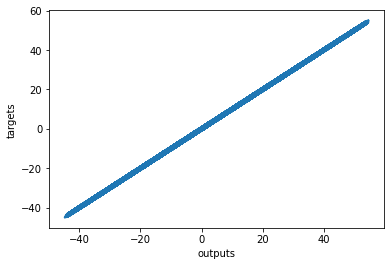

In [10]:
# The model is optimized, so the outputs are calculated based on the last form of the model

# We have to np.squeeze the arrays in order to fit them to what the plot function expects.
# Doesn't change anything as we cut dimensions of size 1 - just a technicality.
plt.plot(np.squeeze(model.predict_on_batch(data['inputs'])), np.squeeze(data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

